In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# import data
my_df = pd.read_csv('data/sample_data_regression.csv')
my_df.head()

,output,input1,input2,input3
0,564,534,536,466
1,182,264,103,244
2,323,272,339,609
3,438,416,444,330
4,547,520,464,104


In [3]:
# split data into input and output objects
X = my_df.drop(['output'], axis = 1)
y = my_df['output']

In [4]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
# instantiate model object
regressor = DecisionTreeRegressor()

In [6]:
# train model
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [7]:
# assess model accuracy
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)

r2

0.34272627656593124

[Text(0.5066105769230769, 0.9666666666666667, 'input2 <= 454.5\nsquared_error = 17871.221\nsamples = 80\nvalue = 439.438'),
 Text(0.20012019230769232, 0.9, 'input1 <= 309.5\nsquared_error = 7502.867\nsamples = 42\nvalue = 348.548'),
 Text(0.057692307692307696, 0.8333333333333334, 'input2 <= 268.5\nsquared_error = 4931.917\nsamples = 12\nvalue = 259.5'),
 Text(0.038461538461538464, 0.7666666666666667, 'input3 <= 683.5\nsquared_error = 3672.556\nsamples = 6\nvalue = 212.667'),
 Text(0.028846153846153848, 0.7, 'input2 <= 265.5\nsquared_error = 1159.04\nsamples = 5\nvalue = 189.4'),
 Text(0.019230769230769232, 0.6333333333333333, 'input1 <= 261.5\nsquared_error = 224.188\nsamples = 4\nvalue = 173.75'),
 Text(0.009615384615384616, 0.5666666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 150.0'),
 Text(0.028846153846153848, 0.5666666666666667, 'input2 <= 254.0\nsquared_error = 48.222\nsamples = 3\nvalue = 181.667'),
 Text(0.019230769230769232, 0.5, 'input3 <= 409.5\nsquared_error = 16.

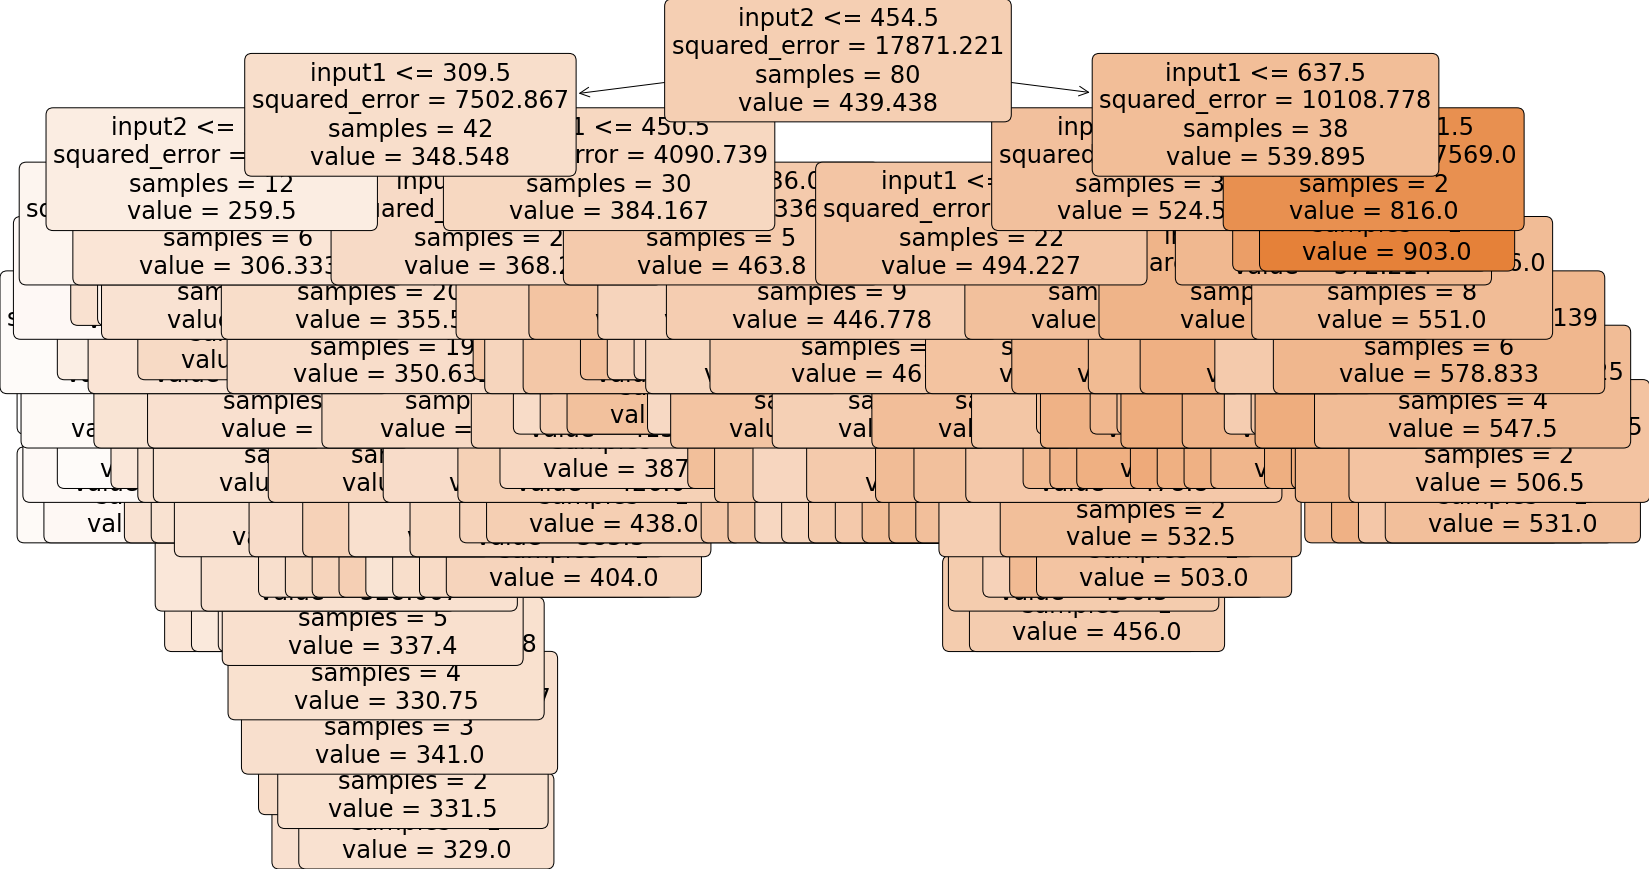

In [8]:
# plot decission tree
plt.figure(figsize = (25, 15))
tree = plot_tree(
    regressor,
    feature_names = X.columns,
    filled = True,
    rounded = True,
    fontsize = 24
)

tree

Without parameters to specificy splitting and stopping criteria, the model created leaf nodes with very small samples and this model is overfitted. Splitting and stopping will be gone into more depth in the advanced module, but we can add a minimum size parameter to the regressor object to see the difference.  

In [12]:
# instantiate model object with minimum leaf node size
regressor_min = DecisionTreeRegressor(min_samples_leaf = 7)

In [13]:
# train model
regressor_min.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=7)

In [14]:
# assess model accuracy
y_pred_min = regressor_min.predict(X_test)
r2 = r2_score(y_test, y_pred)

r2

0.34272627656593124

[Text(0.5, 0.9, 'input2 <= 454.5\nsquared_error = 17871.221\nsamples = 80\nvalue = 439.438'),
 Text(0.16666666666666666, 0.7, 'input1 <= 309.5\nsquared_error = 7502.867\nsamples = 42\nvalue = 348.548'),
 Text(0.08333333333333333, 0.5, 'squared_error = 4931.917\nsamples = 12\nvalue = 259.5'),
 Text(0.25, 0.5, 'input1 <= 356.5\nsquared_error = 4090.739\nsamples = 30\nvalue = 384.167'),
 Text(0.16666666666666666, 0.3, 'squared_error = 1544.6\nsamples = 10\nvalue = 343.0'),
 Text(0.3333333333333333, 0.3, 'input1 <= 432.0\nsquared_error = 4092.788\nsamples = 20\nvalue = 404.75'),
 Text(0.25, 0.1, 'squared_error = 3090.521\nsamples = 13\nvalue = 388.692'),
 Text(0.4166666666666667, 0.1, 'squared_error = 4585.959\nsamples = 7\nvalue = 434.571'),
 Text(0.8333333333333334, 0.7, 'input2 <= 577.5\nsquared_error = 10108.778\nsamples = 38\nvalue = 539.895'),
 Text(0.75, 0.5, 'input1 <= 533.5\nsquared_error = 5001.892\nsamples = 28\nvalue = 506.464'),
 Text(0.6666666666666666, 0.3, 'input1 <= 497.5\

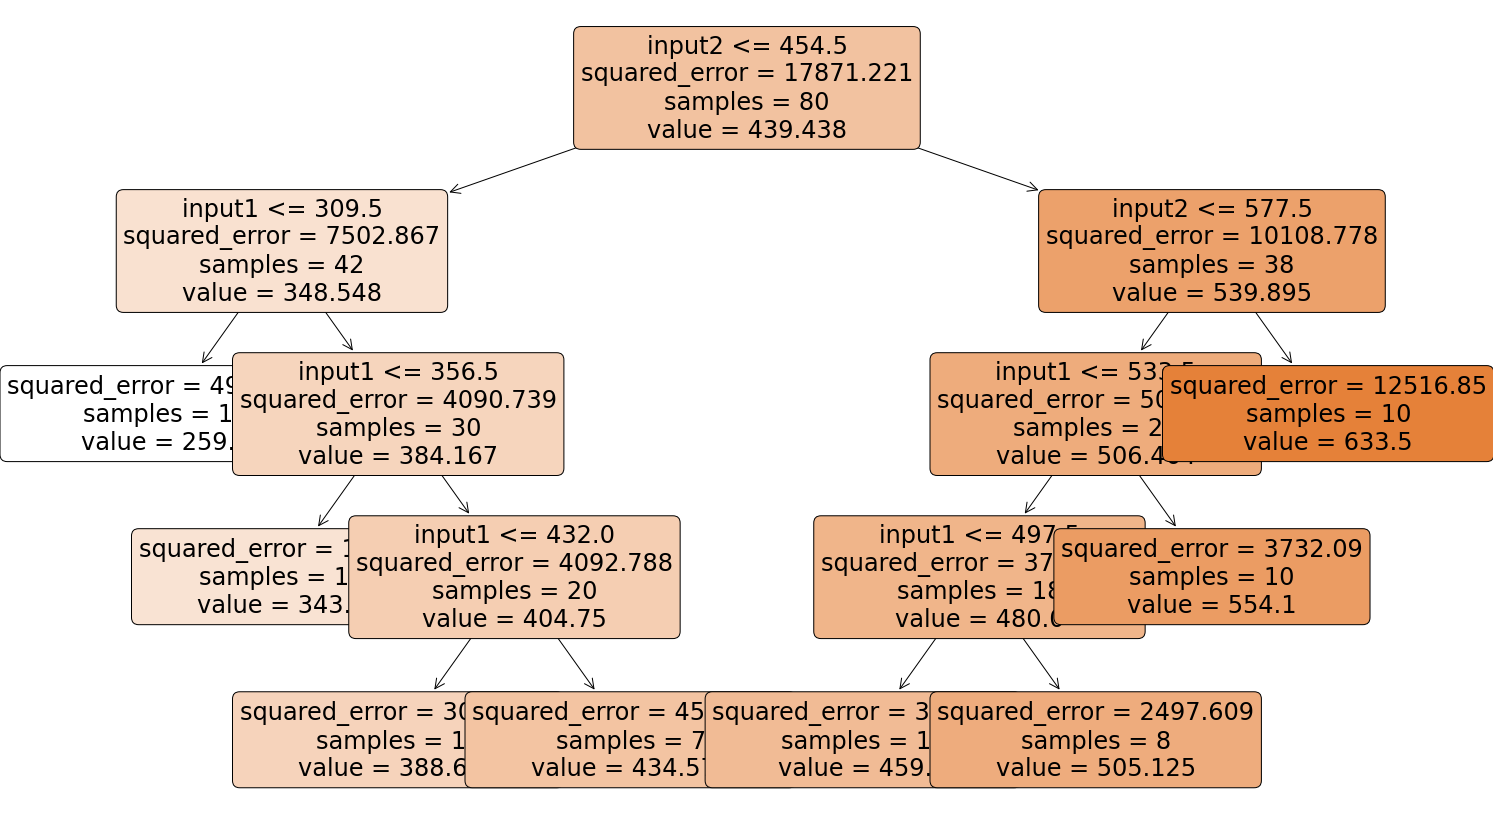

In [15]:
# plot decission tree
plt.figure(figsize = (25, 15))
tree = plot_tree(
    regressor_min,
    feature_names = X.columns,
    filled = True,
    rounded = True,
    fontsize = 24
)

tree

In [17]:
# demonstration of overfitting (run prediction on training set)
y_pred_training = regressor_min.predict(X_train)
r2_overfit = r2_score(y_train, y_pred_training)

r2_overfit

0.7427843230553708